In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft as fft_check
import IPython
%matplotlib inline

In [9]:
class Signal(object):
    
    def __init__(self, rate, samples):
        self.rate = rate
        self.samples = samples
        
    def plot(self):
        cycle = 1/float(self.rate)
        duration = (len(self.samples)-1)*cycle
        
        x = np.linspace(0,duration,len(self.samples))
        
        #plt.subplot(121)
        plt.plot(x, self.samples)
        plt.title("Wave Amplitutde")
        plt.xlabel("Seconds")
        #plt.gca().set_aspect("equal")
        plt.show()
        
        #plt.subplot(122)
        y = fft_check(self.samples)
        plt.plot(np.real(y))
        #plt.gca().set_aspect("equal")
        plt.title("Fourier Coefficients")
        
        plt.tight_layout()
        plt.show()
        
    def export(self, filename):
        scale = 3270./max(np.abs(self.samples))
        if scale < 50:
            scale = 1
        data = scale*self.samples
        wavfile.write(filename+'.wav', self.rate, data.astype(np.int16))
        
    def __add__(self, other):
        s, o = self.samples, other.samples
        length = min(len(s), len(o))
        s = s[:length]
        o = o[:length]
        return Signal(self.rate, s + o)
    
    def __mult__(self, a):
        return Signal(self.rate, self.samples*a)
    
    def __div__(self, a):
        return Signal(self.rate, self.samples/a)

    def play(self):
        self.export('play')

In [10]:
samplerate = 44100

rate, balloon = wavfile.read('balloon.wav')
balloon = Signal(rate, balloon)
rate, chopin = wavfile.read('chopin.wav')
chopin = Signal(rate, chopin)
rate, chopin_full = wavfile.read('chopin_full.wav')
chopin_full = Signal(rate, chopin_full)
rate, NoisySignal1 = wavfile.read('NoisySignal1.wav')
NoisySignal1 = Signal(rate, NoisySignal1)
rate, NoisySignal2 = wavfile.read('NoisySignal2.wav')
NoisySignal2 = Signal(rate, NoisySignal2)
rate, pianoclip = wavfile.read('pianoclip.wav')
pianoclip = Signal(rate, pianoclip)
rate, pulseramp = wavfile.read('pulseramp.wav')
pulseramp = Signal(rate, pulseramp)
rate, saw = wavfile.read('saw.wav')
saw = Signal(rate, saw)
rate, tada_conv = wavfile.read('tada-conv.wav')
tada_conv = Signal(rate, tada_conv)
rate, tada = wavfile.read('tada.wav')
tada = Signal(rate, tada)

## Make a Single Tone

In [11]:
def make_wav(frequency, duration):
    srate = 44100
    t = np.linspace(0, duration, duration*srate)
    return Signal(srate, (5000*np.sin(2*np.pi*frequency*t)))


## Create the notes

In [15]:
#def play(notes):
#    rate = 44100
#    symphony = Signal(rate, np.hstack([x.samples for x in notes]))
#    symphony.export('abcde')

length = 5 #seconds
A = make_wav(340, length)
B = make_wav(493.88, length)
C = make_wav(523.25, length)
D = make_wav(587.33, length)
E = make_wav(659.25, length)
F = make_wav(698.46, length)
G = make_wav(783.99, length)
N = make_wav(10, length) #this is for making a pause
AU = make_wav(880, length)

#funtion for combining audio
def combine(notes, length = 1.):
    rate = 44100
    
    ar_length = int(rate*length)
    symphony = Signal(rate, np.hstack([x.samples[:ar_length] for x in notes]))
    return symphony


## Mary had a Little Lamb

In [13]:
mll = np.array([E, D, C, D, E, E, E, N, D, D, D, N, E, G, G, N, E, D, C, D, E, E, E, E, D, D, E, D, C])
mary_little_lamb = combine(mll, 0.35)

mary_little_lamb.play()

print "Enjoy!"
IPython.display.Audio('play.wav')

Enjoy!


## Fourier Transform

In [68]:
def DFT(ar):
    N = len(ar)
    c = np.zeros(N).astype(np.complex64)
    n = np.arange(N).astype(np.complex64)
    i = np.complex(0,1)
    omega_n = np.exp(2*i*np.pi/N)
    e = np.full_like(n, omega_n)
    
    for k in range(N):
        c[k] = sum(ar*e**(n*k))
        
    #c = np.hstack([c[0:terms/2+1],c[-terms/2:-1]])
    return c

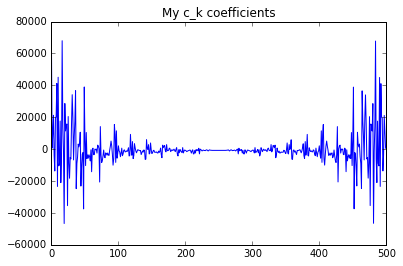

In [69]:
test_signal = tada
c = DFT(np.array(test_signal.samples[:500]))
plt.plot(np.real(c))
plt.title('My c_k coefficients')
plt.show()

#check my answer against scipy
#ans = fft_check(test_signal.samples[:500])
#plt.plot(ans)
#plt.title('Scipy coefficients')
#plt.show()